# Exploratory Data Analysis - Processed Volume Bars

Brief exploration of the cleaned and processed data to understand the volume bars, features, and labels.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

import os
import sys

# Set working directory to project root
os.chdir('..')
print(f"Working directory: {os.getcwd()}")


Working directory: c:\Users\doqui\OneDrive\Documents\cs4641-131-project


In [2]:
# Load and sample from all processed files
processed_dir = Path('./data/processed')

all_files = list(processed_dir.glob('*/*_processed.parquet'))
print(f"Found {len(all_files)} processed files")

all_data = []
for file in all_files:
    df_temp = pd.read_parquet(file)
    all_data.append(df_temp)

# Combine all data
df_full = pd.concat(all_data, ignore_index=True)
print(f"Total data shape: {df_full.shape}")

# Sample proportionally from each ticker
target_sample_size = 750
tickers = df_full['ticker'].unique()
samples_per_ticker = target_sample_size // len(tickers)

sampled_dfs = []
for ticker in tickers:
    ticker_data = df_full[df_full['ticker'] == ticker]
    n_samples = min(samples_per_ticker, len(ticker_data))
    sampled = ticker_data.sample(n=n_samples, random_state=42)
    sampled_dfs.append(sampled)

df = pd.concat(sampled_dfs, ignore_index=True)

print(f"\nSampled data shape: {df.shape}")
print(f"Tickers represented: {sorted(df['ticker'].unique())}")
print(f"Samples per ticker: ~{samples_per_ticker}")
print(f"\nFirst few rows:")
df.head()


Found 100 processed files
Total data shape: (46855, 26)

Sampled data shape: (740, 26)
Tickers represented: ['CCL', 'CNC', 'DAL', 'DECK', 'DLTR', 'DOW', 'DXCM', 'EQT', 'FCX', 'INTC', 'KVUE', 'MCHP', 'NCLH', 'ON', 'PCG', 'SLB', 'SMCI', 'TTD', 'UBER', 'XYZ']
Samples per ticker: ~37

First few rows:


,t,t_end,open,high,low,close,volume,vwap,trade_count,ticker,...,feat_relative_volume,feat_time_of_day,feat_context_bar_count,feat_context_avg_volume,feat_context_price_range,ewm_std,label,label_t_end,label_holding_period_seconds,label_barrier_hit
0,2025-10-03 15:45:41+00:00,2025-10-03 15:46:01+00:00,28.920000,28.920000,28.889999,28.895000,4697,28.898746,30,CCL,...,0.958405,0.363009,12.0,5026.166504,0.002769,0.000656,-1,2025-10-03 15:47:09+00:00,68.0,lower
1,2025-10-03 15:47:09+00:00,2025-10-03 15:48:05+00:00,28.889999,28.900000,28.870001,28.895000,4618,28.881807,31,CCL,...,0.920883,0.367083,11.0,4920.181641,0.002077,0.000646,1,2025-10-03 15:49:05+00:00,60.0,upper
2,2025-10-03 13:57:59+00:00,2025-10-03 13:58:38+00:00,28.940001,28.940001,28.924999,28.934999,4634,28.932604,34,CCL,...,0.959887,0.063843,7.0,4667.714355,0.004493,0.001052,-1,2025-10-03 14:00:03+00:00,85.0,lower
3,2025-10-02 18:24:52+00:00,2025-10-02 18:25:57+00:00,28.799999,28.809999,28.799999,28.809999,4903,28.806597,17,CCL,...,0.982526,0.805185,4.0,4676.500000,0.000868,0.000551,-1,2025-10-02 18:27:34+00:00,97.0,lower
4,2025-10-08 14:49:15+00:00,2025-10-08 14:49:27+00:00,29.145000,29.150000,29.125000,29.129999,4686,29.141218,19,CCL,...,0.953709,0.206250,18.0,4942.055664,0.002403,0.000773,1,2025-10-08 14:49:27+00:00,0.0,upper


## Ticker Distribution

Distribution of samples across different tickers.



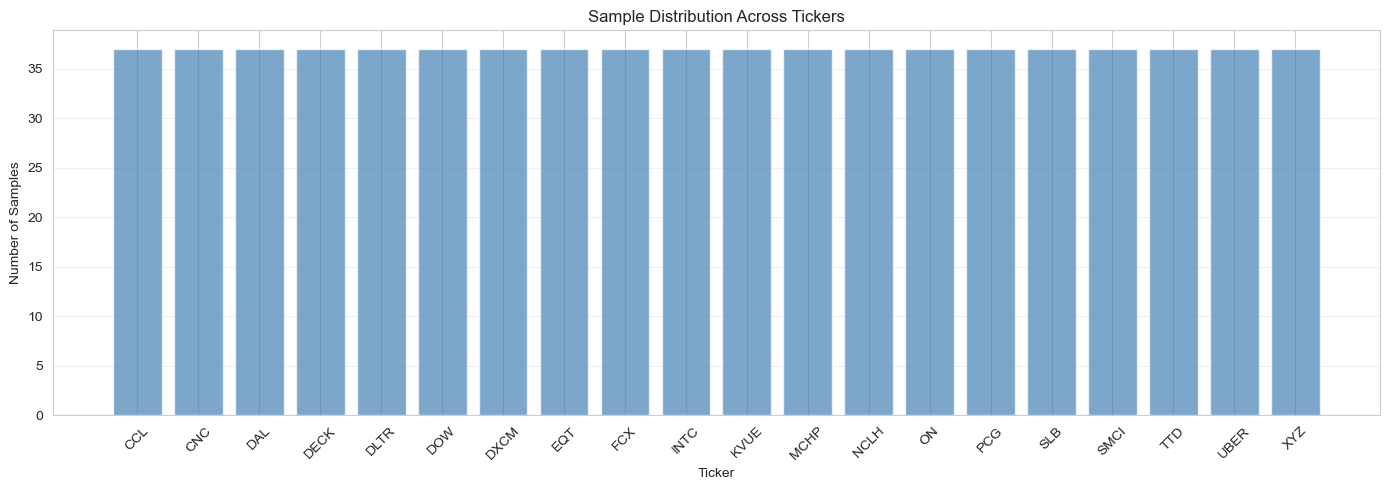

Total tickers: 20
Total samples: 740


In [3]:
# Ticker distribution
ticker_counts = df['ticker'].value_counts().sort_index()

plt.figure(figsize=(14, 5))
plt.bar(ticker_counts.index, ticker_counts.values, color='steelblue', alpha=0.7)
plt.xlabel('Ticker')
plt.ylabel('Number of Samples')
plt.title('Sample Distribution Across Tickers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Total tickers: {len(ticker_counts)}")
print(f"Total samples: {len(df)}")


## Label Distribution

Distribution of the triple-barrier labels and which barriers were hit.


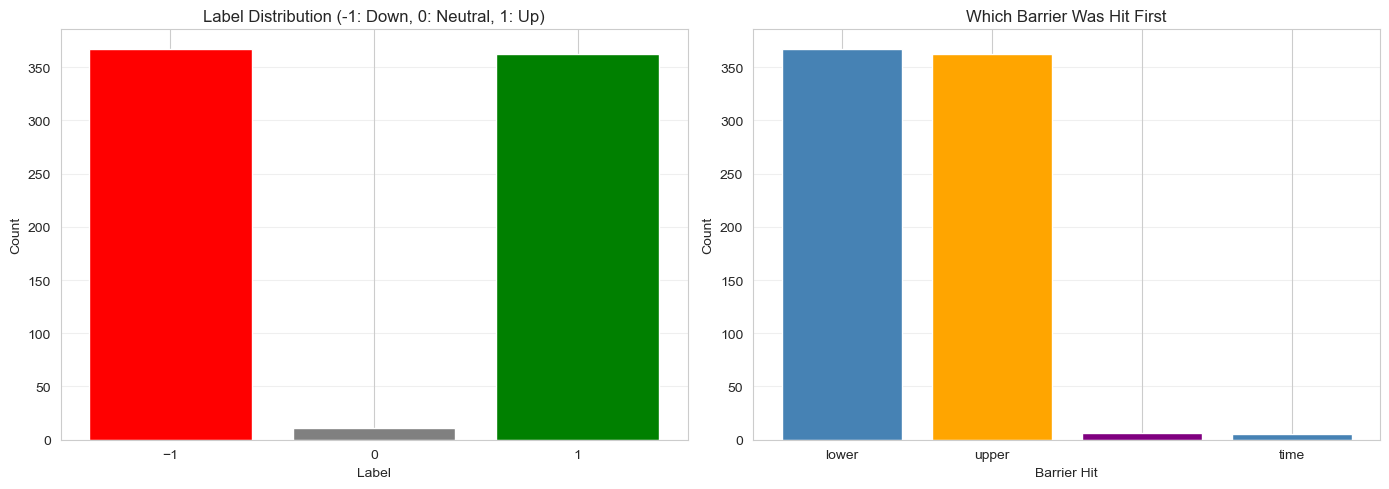


Label distribution:
  Up (1):      362 (48.9%)
  Neutral (0): 11 (1.5%)
  Down (-1):   367 (49.6%)


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Label counts
label_counts = df['label'].value_counts().sort_index()
axes[0].bar(label_counts.index, label_counts.values, color=['red', 'gray', 'green'])
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Label Distribution (-1: Down, 0: Neutral, 1: Up)')
axes[0].set_xticks([-1, 0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# Barrier hit distribution
barrier_counts = df['label_barrier_hit'].value_counts()
axes[1].bar(barrier_counts.index, barrier_counts.values, color=['steelblue', 'orange', 'purple'])
axes[1].set_xlabel('Barrier Hit')
axes[1].set_ylabel('Count')
axes[1].set_title('Which Barrier Was Hit First')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nLabel distribution:")
print(f"  Up (1):      {(df['label'] == 1).sum()} ({(df['label'] == 1).sum() / len(df) * 100:.1f}%)")
print(f"  Neutral (0): {(df['label'] == 0).sum()} ({(df['label'] == 0).sum() / len(df) * 100:.1f}%)")
print(f"  Down (-1):   {(df['label'] == -1).sum()} ({(df['label'] == -1).sum() / len(df) * 100:.1f}%)")


## Price and Volume Visualization

Example from one ticker showing volume bars with OHLC data.



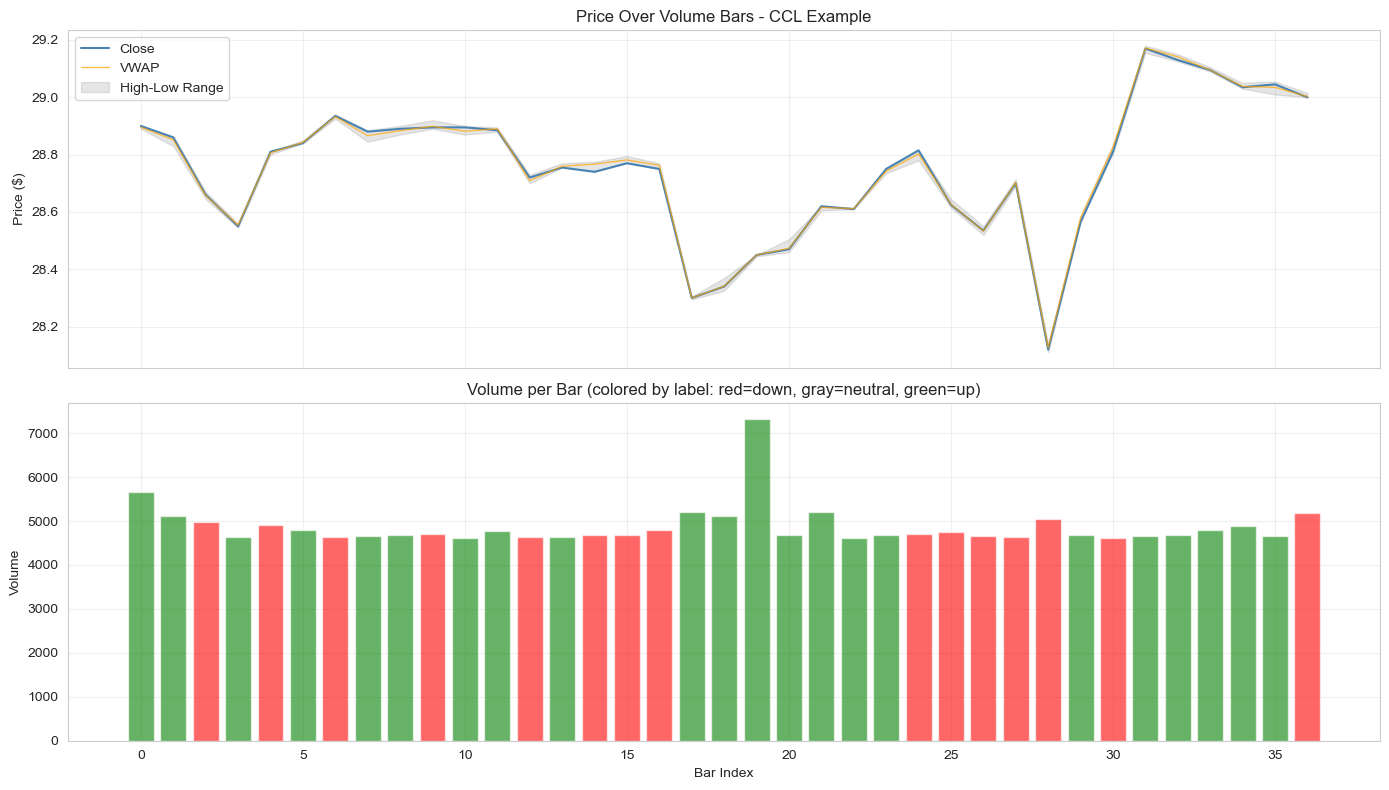


Overall price statistics across all tickers:
  Min:  $15.43
  Max:  $104.43
  Mean: $51.31

Overall volume statistics:
  Total volume: 3,181,138
  Avg per bar:  4299


In [5]:
# Show example from one ticker (select one with good representation)
example_ticker = df['ticker'].value_counts().index[0]
df_example = df[df['ticker'] == example_ticker].sort_values('t').reset_index(drop=True)

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Price chart
axes[0].plot(df_example.index, df_example['close'], label='Close', linewidth=1.5, color='steelblue')
axes[0].plot(df_example.index, df_example['vwap'], label='VWAP', linewidth=1, alpha=0.7, color='orange')
axes[0].fill_between(df_example.index, df_example['low'], df_example['high'], alpha=0.2, color='gray', label='High-Low Range')
axes[0].set_ylabel('Price ($)')
axes[0].set_title(f'Price Over Volume Bars - {example_ticker} Example')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volume chart - colored by label
colors = df_example['label'].map({-1: 'red', 0: 'gray', 1: 'green'})
axes[1].bar(df_example.index, df_example['volume'], color=colors, alpha=0.6)
axes[1].set_xlabel('Bar Index')
axes[1].set_ylabel('Volume')
axes[1].set_title('Volume per Bar (colored by label: red=down, gray=neutral, green=up)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOverall price statistics across all tickers:")
print(f"  Min:  ${df['low'].min():.2f}")
print(f"  Max:  ${df['high'].max():.2f}")
print(f"  Mean: ${df['close'].mean():.2f}")
print(f"\nOverall volume statistics:")
print(f"  Total volume: {df['volume'].sum():,}")
print(f"  Avg per bar:  {df['volume'].mean():.0f}")


## Feature Distributions

Distribution of engineered features across all volume bars.



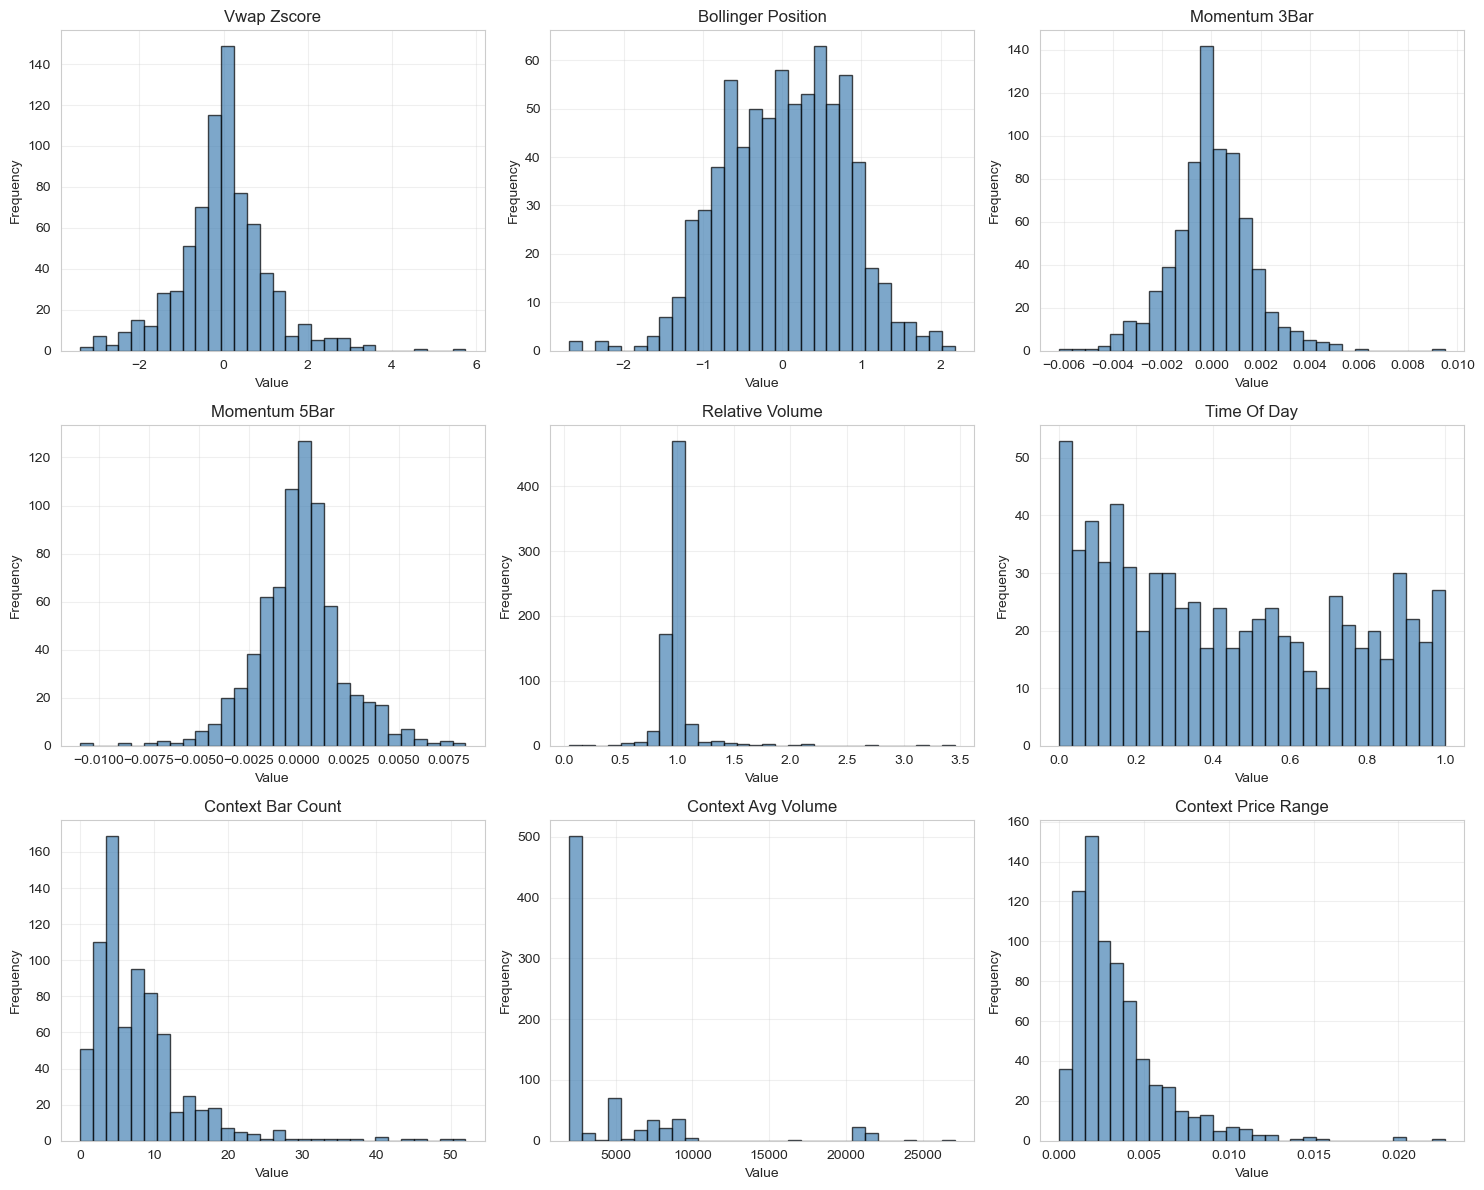


Feature summary statistics:
       feat_vwap_zscore  feat_bollinger_position  feat_momentum_3bar  \
count        740.000000               740.000000          731.000000   
mean          -0.017453                 0.035350            0.000015   
std            1.056434                 0.750686            0.001604   
min           -3.411362                -2.682557           -0.006187   
25%           -0.548806                -0.535172           -0.000828   
50%            0.000000                 0.056537            0.000000   
75%            0.485088                 0.607728            0.000914   
max            5.737819                 2.179450            0.009480   

       feat_momentum_5bar  feat_relative_volume  feat_time_of_day  \
count          728.000000            740.000000        740.000000   
mean             0.000022              0.995261          0.433406   
std              0.002151              0.194671          0.307052   
min             -0.010947              0.05048

In [6]:
# Get feature columns
feature_cols = [col for col in df.columns if col.startswith('feat_')]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, feat in enumerate(feature_cols):
    axes[idx].hist(df[feat].dropna(), bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(feat.replace('feat_', '').replace('_', ' ').title())
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots if we have fewer than 9 features
for idx in range(len(feature_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"\nFeature summary statistics:")
print(df[feature_cols].describe())


## Feature Correlations

Correlation between features and the label.



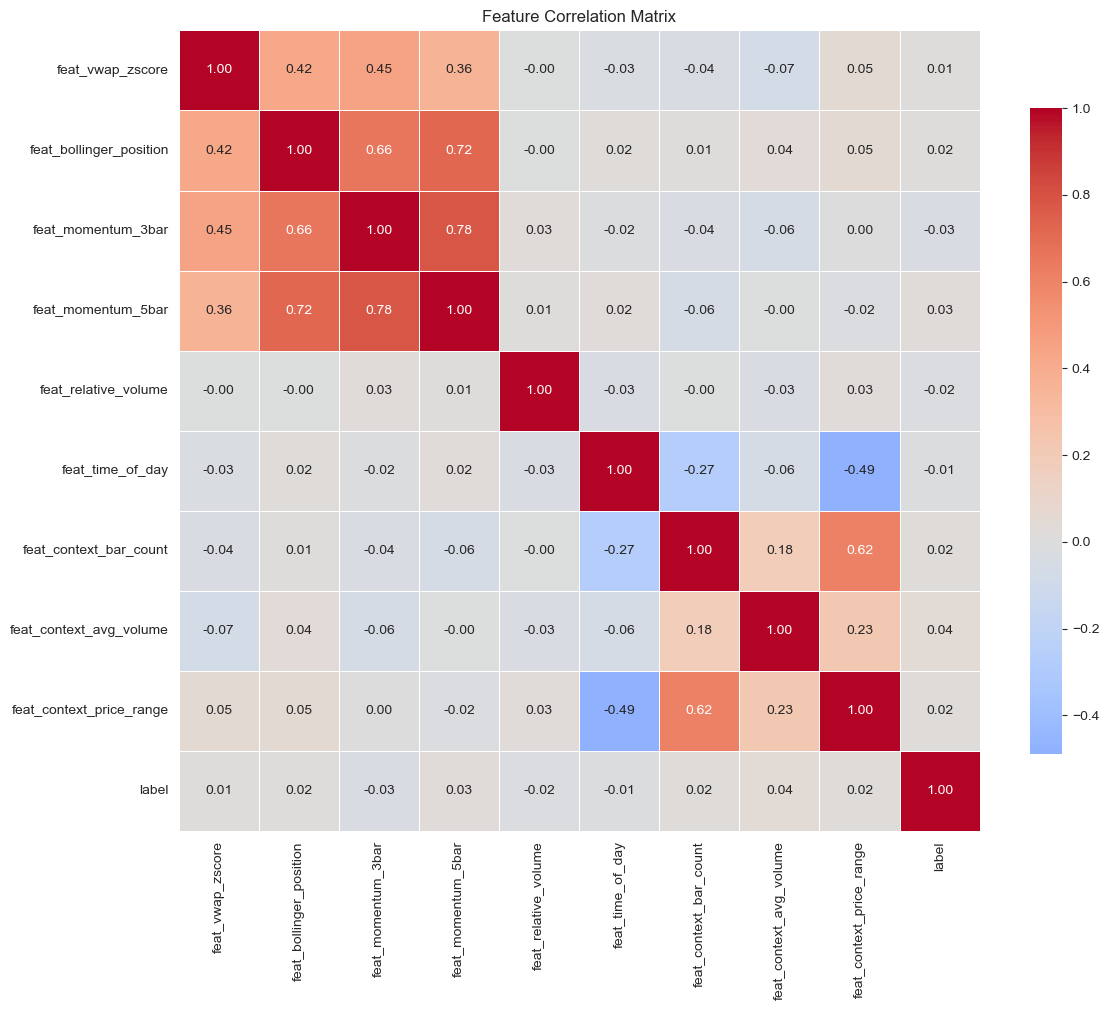


Feature correlations with label (sorted by absolute value):
feat_context_avg_volume     0.042606
feat_momentum_3bar          0.034618
feat_momentum_5bar          0.025091
feat_relative_volume        0.022921
feat_context_price_range    0.019855
feat_context_bar_count      0.018750
feat_bollinger_position     0.015049
feat_time_of_day            0.014514
feat_vwap_zscore            0.009632
Name: label, dtype: float64


In [7]:
# Correlation heatmap
features_and_label = feature_cols + ['label']
corr_matrix = df[features_and_label].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with label specifically
label_corr = corr_matrix['label'].drop('label').sort_values(ascending=False)
print("\nFeature correlations with label (sorted by absolute value):")
print(label_corr.abs().sort_values(ascending=False))


## Volume Bar Characteristics

Understanding the time characteristics of the volume bars.



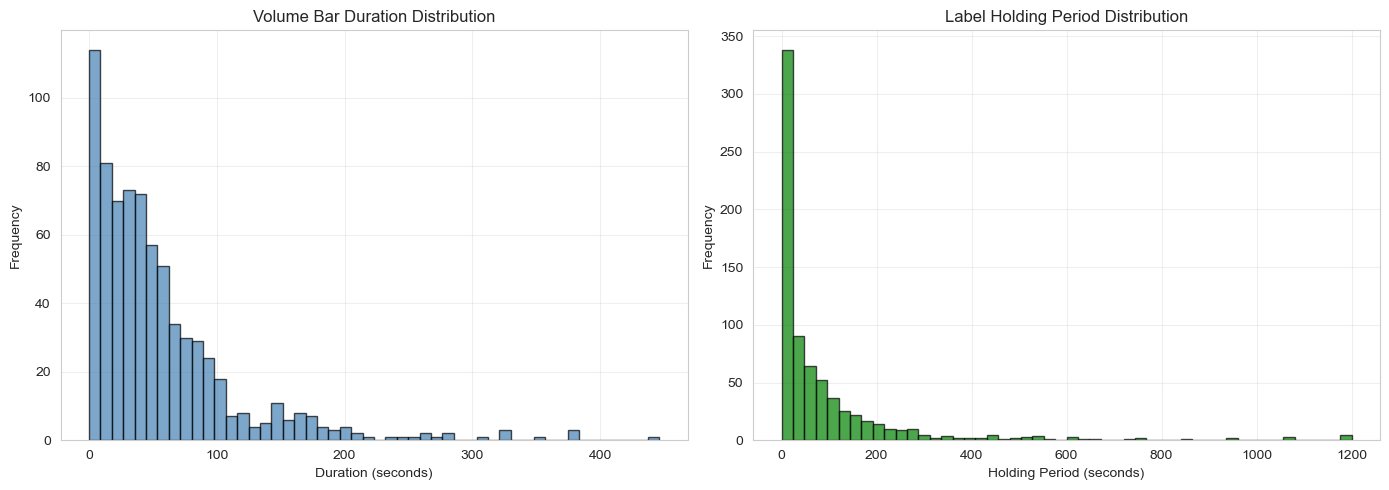


Volume Bar Duration Statistics:
  Mean:   55.32 seconds
  Median: 39.00 seconds
  Min:    0.00 seconds
  Max:    446.00 seconds

Label Holding Period Statistics:
  Mean:   91.56 seconds
  Median: 32.00 seconds
  Min:    0.00 seconds
  Max:    1200.00 seconds


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Duration of volume bars
axes[0].hist(df['duration_seconds'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Volume Bar Duration Distribution')
axes[0].grid(True, alpha=0.3)

# Holding period for labels
axes[1].hist(df['label_holding_period_seconds'].dropna(), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Holding Period (seconds)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Label Holding Period Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVolume Bar Duration Statistics:")
print(f"  Mean:   {df['duration_seconds'].mean():.2f} seconds")
print(f"  Median: {df['duration_seconds'].median():.2f} seconds")
print(f"  Min:    {df['duration_seconds'].min():.2f} seconds")
print(f"  Max:    {df['duration_seconds'].max():.2f} seconds")

print(f"\nLabel Holding Period Statistics:")
print(f"  Mean:   {df['label_holding_period_seconds'].mean():.2f} seconds")
print(f"  Median: {df['label_holding_period_seconds'].median():.2f} seconds")
print(f"  Min:    {df['label_holding_period_seconds'].min():.2f} seconds")
print(f"  Max:    {df['label_holding_period_seconds'].max():.2f} seconds")
